In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# 데이터 불러오기
max_words = 5000
max_len = 100
(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=max_words, test_split=0.2)

# 데이터 전처리
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
num_classes = np.max(y_train) + 1

# CNN 모델 생성
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping]
)

# 모델 평가 및 평가지표 출력
y_pred = model.predict(x_test).argmax(axis=1)
accuracy_5000 = accuracy_score(y_test, y_pred)
f1_macro_5000 = f1_score(y_test, y_pred, average='macro')
f1_weighted_5000 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy_5000:.4f}')
print(f'Macro F1 Score: {f1_macro_5000:.4f}')
print(f'Weighted F1 Score: {f1_weighted_5000:.4f}')

2121728/2110848 [==============================] - 0s 0us/step
Epoch 1/20
141/141 [==============================] - 22s 7ms/step - loss: 2.2009 - accuracy: 0.4742 - val_loss: 1.7068 - val_accuracy: 0.5748
Epoch 2/20
141/141 [==============================] - 1s 4ms/step - loss: 1.4380 - accuracy: 0.6554 - val_loss: 1.4002 - val_accuracy: 0.6679
Epoch 3/20
141/141 [==============================] - 1s 4ms/step - loss: 1.1067 - accuracy: 0.7326 - val_loss: 1.2360 - val_accuracy: 0.6950
Epoch 4/20
141/141 [==============================] - 1s 4ms/step - loss: 0.8338 - accuracy: 0.7960 - val_loss: 1.1545 - val_accuracy: 0.7231
Epoch 5/20
141/141 [==============================] - 1s 4ms/step - loss: 0.5935 - accuracy: 0.8509 - val_loss: 1.1622 - val_accuracy: 0.7257
Epoch 6/20
141/141 [==============================] - 1s 4ms/step - loss: 0.4213 - accuracy: 0.8959 - val_loss: 1.2110 - val_accuracy: 0.7386
Epoch 7/20
141/141 [==============================] - 1s 4ms/step - loss: 0.3195 - a

In [3]:
# 데이터 불러오기
max_words = 10000
max_len = 100
(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=max_words, test_split=0.2)

# 데이터 전처리
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
num_classes = np.max(y_train) + 1

# CNN 모델 생성
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping]
)

# 모델 평가 및 평가지표 출력
y_pred = model.predict(x_test).argmax(axis=1)
accuracy_10000 = accuracy_score(y_test, y_pred)
f1_macro_10000 = f1_score(y_test, y_pred, average='macro')
f1_weighted_10000 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy_10000:.4f}')
print(f'Macro F1 Score: {f1_macro_10000:.4f}')
print(f'Weighted F1 Score: {f1_weighted_10000:.4f}')

Epoch 1/20
141/141 [==============================] - 1s 5ms/step - loss: 2.1977 - accuracy: 0.4646 - val_loss: 1.7032 - val_accuracy: 0.5784
Epoch 2/20
141/141 [==============================] - 1s 4ms/step - loss: 1.4329 - accuracy: 0.6564 - val_loss: 1.3705 - val_accuracy: 0.6656
Epoch 3/20
141/141 [==============================] - 1s 4ms/step - loss: 1.0581 - accuracy: 0.7426 - val_loss: 1.2102 - val_accuracy: 0.7070
Epoch 4/20
141/141 [==============================] - 1s 4ms/step - loss: 0.7421 - accuracy: 0.8177 - val_loss: 1.1283 - val_accuracy: 0.7297
Epoch 5/20
141/141 [==============================] - 1s 4ms/step - loss: 0.5089 - accuracy: 0.8712 - val_loss: 1.1480 - val_accuracy: 0.7395
Epoch 6/20
141/141 [==============================] - 1s 4ms/step - loss: 0.3510 - accuracy: 0.9178 - val_loss: 1.1819 - val_accuracy: 0.7409
Epoch 7/20
141/141 [==============================] - 1s 4ms/step - loss: 0.2698 - accuracy: 0.9367 - val_loss: 1.2077 - val_accuracy: 0.7480
Accura

In [4]:
# 데이터 불러오기
max_words = 15000
max_len = 100
(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=max_words, test_split=0.2)

# 데이터 전처리
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
num_classes = np.max(y_train) + 1

# CNN 모델 생성
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping]
)

# 모델 평가 및 평가지표 출력
y_pred = model.predict(x_test).argmax(axis=1)
accuracy_15000 = accuracy_score(y_test, y_pred)
f1_macro_15000 = f1_score(y_test, y_pred, average='macro')
f1_weighted_15000 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy_15000:.4f}')
print(f'Macro F1 Score: {f1_macro_15000:.4f}')
print(f'Weighted F1 Score: {f1_weighted_15000:.4f}')

Epoch 1/20
141/141 [==============================] - 1s 5ms/step - loss: 2.1801 - accuracy: 0.4698 - val_loss: 1.7082 - val_accuracy: 0.5695
Epoch 2/20
141/141 [==============================] - 1s 4ms/step - loss: 1.4462 - accuracy: 0.6511 - val_loss: 1.4070 - val_accuracy: 0.6643
Epoch 3/20
141/141 [==============================] - 1s 4ms/step - loss: 1.0738 - accuracy: 0.7457 - val_loss: 1.2425 - val_accuracy: 0.7079
Epoch 4/20
141/141 [==============================] - 1s 4ms/step - loss: 0.7498 - accuracy: 0.8232 - val_loss: 1.1823 - val_accuracy: 0.7217
Epoch 5/20
141/141 [==============================] - 1s 4ms/step - loss: 0.5034 - accuracy: 0.8744 - val_loss: 1.2164 - val_accuracy: 0.7235
Epoch 6/20
141/141 [==============================] - 1s 4ms/step - loss: 0.3565 - accuracy: 0.9174 - val_loss: 1.2441 - val_accuracy: 0.7373
Epoch 7/20
141/141 [==============================] - 1s 4ms/step - loss: 0.2681 - accuracy: 0.9409 - val_loss: 1.2981 - val_accuracy: 0.7346
Accura

##### CNN모델 결과
- 5000 단어 :  정확도 0.7217, 단순평균 F1 점수 0.2446, 가중평균 F1 점수 0.6968
- 10000 단어 : 정확도 0.7297, 단순평균 F1 점수 0.2392, 가중평균 F1 점수 0.6989
- 15000 단어 : 정확도 0.7217, 단순평균 F1 점수 0.2446, 가중평균 F1 점수 0.6968

In [ ]:
import matplotlib.pyplot as plt

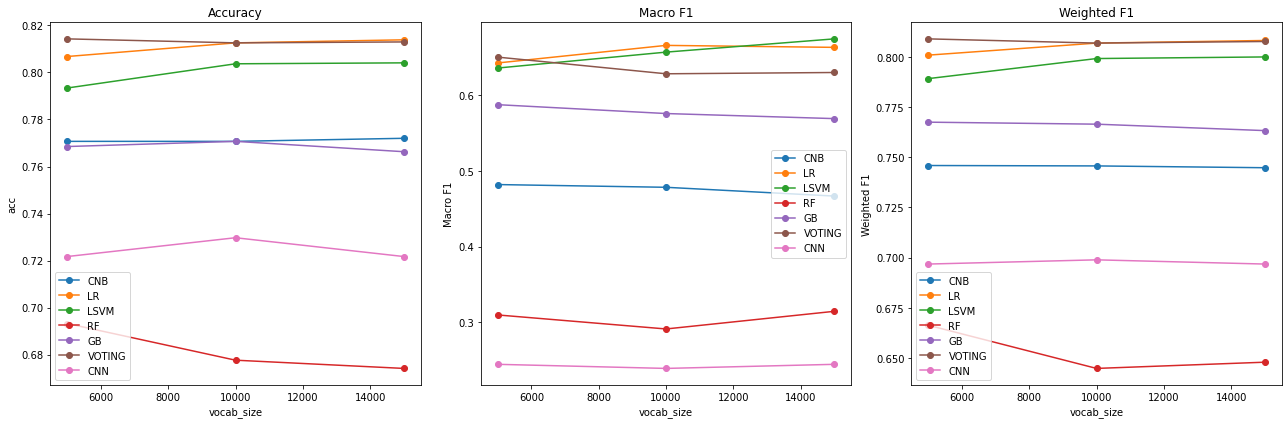

In [10]:
# 머신러닝모델과 CNN모델 성능 시각화

# x축 값 (단어 수)
x = [5000, 10000, 15000]

# 모델별 정확도, 단순평균 F1, 가중평균 F1 점수
models = {
    'CNB': {
        'accuracy': [0.7707, 0.7707, 0.7720],
        'f1_macro': [0.4820, 0.4784, 0.4668],
        'f1_weighted': [0.7459, 0.7457, 0.7448]
    },
    'LR': {
        'accuracy': [0.8068, 0.8126, 0.8139],
        'f1_macro': [0.6426, 0.6658, 0.6632],
        'f1_weighted': [0.8009, 0.8069, 0.8082]
    },
    'LSVM': {
        'accuracy': [0.7934, 0.8037, 0.8041],
        'f1_macro': [0.6359, 0.6569, 0.6744],
        'f1_weighted': [0.7892, 0.7992, 0.8000]
    },
    'RF': {
        'accuracy': [0.6932, 0.6776, 0.6741],
        'f1_macro': [0.3098, 0.2913, 0.3146],
        'f1_weighted': [0.6663, 0.6448, 0.6479]
    },
    'GB': {
        'accuracy': [0.7685, 0.7707, 0.7663],
        'f1_macro': [0.5875, 0.5758, 0.5691],
        'f1_weighted': [0.7675, 0.7665, 0.7633]
    },
    'VOTING': {
        'accuracy': [0.8143, 0.8126, 0.8130],
        'f1_macro': [0.6503, 0.6283, 0.6300],
        'f1_weighted': [0.8090, 0.8069, 0.8077]
    },
    'CNN': {
        'accuracy': [0.7217, 0.7297, 0.7217],
        'f1_macro': [0.2446, 0.2392, 0.2446],
        'f1_weighted': [0.6968, 0.6989, 0.6968]
    }
}

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# 정확도 그래프
for model_name, metrics in models.items():
    axes[0].plot(x, metrics['accuracy'], marker='o', label=model_name)
axes[0].set_title('Accuracy')
axes[0].set_xlabel('vocab_size')
axes[0].set_ylabel('acc')
axes[0].legend()

# 단순평균 F1 그래프
for model_name, metrics in models.items():
    axes[1].plot(x, metrics['f1_macro'], marker='o', label=model_name)
axes[1].set_title('Macro F1')
axes[1].set_xlabel('vocab_size')
axes[1].set_ylabel('Macro F1')
axes[1].legend()

# 가중평균 F1 그래프
for model_name, metrics in models.items():
    axes[2].plot(x, metrics['f1_weighted'], marker='o', label=model_name)
axes[2].set_title('Weighted F1')
axes[2].set_xlabel('vocab_size')
axes[2].set_ylabel('Weighted F1')
axes[2].legend()

plt.tight_layout()
plt.show()

#### 결론
- 사용된 단어 개수에 따른 모델 성능의 차이는 크게 나타나지 않았음
- CNN모델의 성능을 전통적인 머신러닝 모델들과 비교하면, 단순평균f1 점수는 최하점수였고, 나머지 점수들도 랜덤포레스트 다음으로 점수가 낮았음